# New predsss

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read in all fileees

In [89]:
icuStays = pd.read_csv('/Users/ashademeij/Downloads/Thesis/Code/new/icuStays.csv') # This is what we are interested in --> the stays in ICU
icuStays.columns = icuStays.columns.str.replace('_x', '')
columns_to_drop = [col for col in icuStays.columns if col.endswith('_y')]
icuStays = icuStays.drop(columns=columns_to_drop)

labevents = pd.read_csv("/Users/ashademeij/Downloads/Thesis/Code/new/labevents.csv")
prescriptions = pd.read_csv("/Users/ashademeij/Downloads/Thesis/Code/new/prescriptions.csv")

print("IcuStays: ", icuStays.shape)
print("labevents: ", labevents.shape)
print("prescriptions: ", prescriptions.shape)

IcuStays:  (50881, 16)
labevents:  (46613, 20)
prescriptions:  (47001, 2731)


In [90]:
# Merge icuStays and labevents DataFrames on 'subject_id' and 'hadm_id'
df = pd.merge(icuStays, labevents, on=['subject_id', 'hadm_id'], how='inner')
print("Merged DataFrame shape:", df.shape)

df = pd.merge(icuStays, prescriptions, on=['subject_id', 'hadm_id'], how='inner')
print("Merged DataFrame shape:", df.shape)

df = df.dropna()
print("Merged DataFrame shape:", df.shape)
df.head()

Merged DataFrame shape: (50407, 34)
Merged DataFrame shape: (50794, 2745)
Merged DataFrame shape: (49833, 2745)


,subject_id,hadm_id,stay_id,intime,outtime,los,admission_location,insurance,raceGrouped,marital_status,...,vitamin D3,vitamin d3,voriconazole,xalatan,zafirlukast,zinc oxide,zonisamide,zydis,zz,prescrip_count
0,10001217,24597018,37067082,2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,Emergency,Other,0.0,MARRIED,...,0,0,0,0,0,0,0,0,0,5
1,10001725,25563031,31205490,2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,Other,Other,0.0,MARRIED,...,0,0,0,0,0,0,0,0,0,17
2,10001884,26184834,37510196,2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817,Emergency,Medicare,1.0,MARRIED,...,0,0,0,0,0,0,0,0,0,24
3,10002013,23581541,39060235,2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352,Referral,Medicare,1.0,SINGLE,...,0,0,0,0,0,0,0,0,0,41
4,10002155,23822395,33685454,2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912,Other,Other,0.0,MARRIED,...,0,0,0,0,0,0,0,0,0,20


In [91]:
df['los'].describe()

count    49833.000000
mean         3.620487
std          3.418715
min          1.000000
25%          1.537222
50%          2.319190
75%          4.152685
max         21.999653
Name: los, dtype: float64

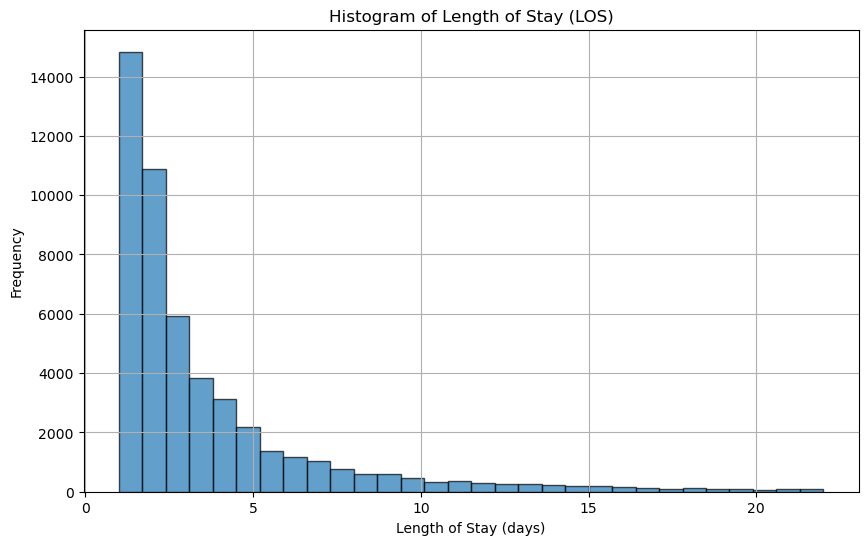

In [92]:
import matplotlib.pyplot as plt

# Plot the histogram of the 'los' column
plt.figure(figsize=(10, 6))
plt.hist(df['los'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Length of Stay (LOS)')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## make dummies

In [93]:
columns_to_encode = ['admission_location', 'insurance', 'marital_status']

# acronyms for the prefixes 
prefixes = {
    'admission_location': 'ADM',
    'insurance': 'INS',
    'marital_status': 'MS',
}

dummy_variables = pd.get_dummies(df[columns_to_encode], prefix=prefixes)
df = pd.concat([df, dummy_variables], axis=1)
df = df.drop(columns=columns_to_encode)

df.head()


,subject_id,hadm_id,stay_id,intime,outtime,los,raceGrouped,gender,age_18-24,age_25-44,...,ADM_Other,ADM_Referral,ADM_Transfer,INS_Medicaid,INS_Medicare,INS_Other,MS_DIVORCED,MS_MARRIED,MS_SINGLE,MS_WIDOWED
0,10001217,24597018,37067082,2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,0.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,10001725,25563031,31205490,2110-04-11 15:52:22,2110-04-12 23:59:56,1.338588,0.0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,10001884,26184834,37510196,2131-01-11 04:20:05,2131-01-20 08:27:30,9.171817,1.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,10002013,23581541,39060235,2160-05-18 10:00:53,2160-05-19 17:33:33,1.314352,1.0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,10002155,23822395,33685454,2129-08-04 12:45:00,2129-08-10 17:02:38,6.178912,0.0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [94]:
columns_to_drop = ['subject_id', 'hadm_id', 'stay_id', 'intime', 'outtime']
df = df.drop(columns=columns_to_drop)

In [62]:
len(df.columns)

2748

In [95]:
corr_with_los = df.corrwith(df['los'])

# Sort correlation values in descending order
top_correlations = corr_with_los.sort_values(ascending=False)

# Print the top 10 highest correlations
print("Top 10 highest correlations with 'los':")
print(top_correlations.head(10))


Top 10 highest correlations with 'los':
los                                         1.000000
Fentanyl Citrate                            0.225711
Soln                                        0.217898
Midazolam                                   0.203741
prescrip_count                              0.197438
NORepinephrine                              0.187598
Vasopressin                                 0.174051
Chlorhexidine Gluconate 0.12% Oral Rinse    0.160522
Propofol                                    0.152965
Famotidine                                  0.148883
dtype: float64


In [96]:
filtered_columns = corr_with_los[(corr_with_los >= -0.05) & (corr_with_los <= 0.05)]

# Drop columns with small correlations
df_filtered = df.drop(columns=filtered_columns.index)
df_filtered.shape

(49833, 141)

# Linear Regression

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [65]:
baseline = df['los'].mean()

In [67]:
# Separate target variable (los) and predictors
X = df_filtered.drop(columns=['los'])  # predictors
y = df_filtered['los']  # target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict los on the test set
y_pred = model.predict(X_test)

baseline_predictions = [baseline] * len(y_test)
print("Mean Squared Error of Baseline:", mean_squared_error(y_test, baseline_predictions))
print("R2 Score of Baseline:", r2_score(y_test, baseline_predictions))

print("")

print("Mean Squared Error of LR:", mean_squared_error(y_test, y_pred))
print("R2 Score of LR:", r2_score(y_test, y_pred))


Mean Squared Error of Baseline: 11.846698971370214
R2 Score of Baseline: -6.5282561578783316e-09

Mean Squared Error of LR: 9.689898913271598
R2 Score of LR: 0.1820591542042882


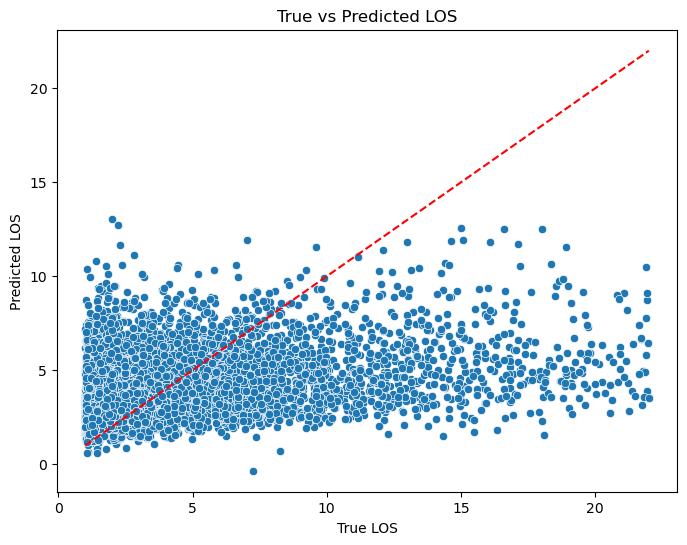

In [68]:
import numpy as np

# Plot true vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect line
plt.xlabel('True LOS')
plt.ylabel('Predicted LOS')
plt.title('True vs Predicted LOS')
plt.show()


# XGBoost: binary

In [98]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [99]:
# Transform target variable into binary categories
df_filtered['los_category'] = np.where(df_filtered['los'] > 4, 'long', 'short')

# Separate target variable (los_category) and predictors
X = df_filtered.drop(columns=['los', 'los_category'])  # predictors
y = df_filtered['los_category']  # target variable

# Encode the target variable into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict LOS category on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy of XGBoost Classifier:", accuracy)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
class_report = classification_report(y_test, y_pred_xgb)
print("Classification Report:")
print(class_report)

# Additional metrics
tn, fp, fn, tp = conf_matrix.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Accuracy of XGBoost Classifier: 0.7573994180796629
Confusion Matrix:
[[ 828 1808]
 [ 610 6721]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.31      0.41      2636
           1       0.79      0.92      0.85      7331

    accuracy                           0.76      9967
   macro avg       0.68      0.62      0.63      9967
weighted avg       0.73      0.76      0.73      9967

Precision: 0.7880
Recall: 0.9168
F1 Score: 0.8475


In [100]:
print(tp + tn)
print(fp + fn)

7549
2418


In [106]:
df_test.columns

Index(['0.83% Sodium Chloride', '0.9% Sodium Chloride',
       '0.9% Sodium Chloride (Mini Bag Plus)', '5% Dextrose',
       '5% Dextrose (EXCEL BAG)', 'AcetaZOLamide Sodium',
       'Acetaminophen (Liquid)', 'Acetylcysteine 20%',
       'Albumin 25% (12.5g / 50mL)', 'Albumin 5%',
       ...
       'Vasopressin', 'Vecuronium Bromide', 'Vial', 'dantrolene', 'tretin',
       'prescrip_count', 'ADM_Referral', 'ADM_Transfer', 'y_test', 'y_pred'],
      dtype='object', length=142)

### Check across protected att

In [104]:
# Create DataFrame for bias analysis
df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_pred'] = y_pred_xgb
df_test['gender'] = df_filtered.loc[df_test.index, 'gender']
df_test['raceGrouped'] = df_filtered.loc[df_test.index, 'raceGrouped']
df_test['INS_Medicaid'] = df_filtered.loc[df_test.index, 'INS_Medicaid']
df_test['INS_Medicare'] = df_filtered.loc[df_test.index, 'INS_Medicare']
df_test['INS_Other'] = df_filtered.loc[df_test.index, 'INS_Other']

# Evaluate performance for gender
print("\nPerformance by Gender:")
for gender in [0, 1]:
    subset = df_test[df_test['gender'] == gender]
    conf_matrix_gender = confusion_matrix(subset['y_test'], subset['y_pred'])
    print(f"Gender: {'Female' if gender == 0 else 'Male'}")
    print(conf_matrix_gender)
    print(classification_report(subset['y_test'], subset['y_pred']))

# Evaluate performance for race
print("\nPerformance by Race:")
for race in [0, 1]:
    subset = df_test[df_test['raceGrouped'] == race]
    conf_matrix_race = confusion_matrix(subset['y_test'], subset['y_pred'])
    print(f"Race: {'Nonminority' if race == 0 else 'Minority'}")
    print(conf_matrix_race)
    print(classification_report(subset['y_test'], subset['y_pred']))

for medicaid in [0, 1]:
    subset = df_test[df_test['INS_Medicaid'] == medicaid]
    conf_matrix_medicaid = confusion_matrix(subset['y_test'], subset['y_pred'])
    print(f"Medicaid: {'No' if medicaid == 0 else 'Yes'}")
    print(conf_matrix_medicaid)
    print(classification_report(subset['y_test'], subset['y_pred']))

# Medicare
for medicare in [0, 1]:
    subset = df_test[df_test['INS_Medicare'] == medicare]
    conf_matrix_medicare = confusion_matrix(subset['y_test'], subset['y_pred'])
    print(f"Medicare: {'No' if medicare == 0 else 'Yes'}")
    print(conf_matrix_medicare)
    print(classification_report(subset['y_test'], subset['y_pred']))

# Other Insurance
for other in [0, 1]:
    subset = df_test[df_test['INS_Other'] == other]
    conf_matrix_other = confusion_matrix(subset['y_test'], subset['y_pred'])
    print(f"Other Insurance: {'No' if other == 0 else 'Yes'}")
    print(conf_matrix_other)
    print(classification_report(subset['y_test'], subset['y_pred']))


KeyError: 'gender'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Assuming df_filtered includes gender, raceGrouped, INS_Medicaid, INS_Medicare, and INS_Other columns
# Transform target variable into binary categories
df_filtered['los_category'] = np.where(df_filtered['los'] > 4, 'long', 'short')

# Separate target variable (los_category) and predictors
X = df_filtered.drop(columns=['los', 'los_category'])  # predictors
y = df_filtered['los_category']  # target variable

# Encode the target variable into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Include non-predictor columns for analysis purposes
X['gender'] = df_filtered['gender']
X['raceGrouped'] = df_filtered['raceGrouped']
X['INS_Medicaid'] = df_filtered['INS_Medicaid']
X['INS_Medicare'] = df_filtered['INS_Medicare']
X['INS_Other'] = df_filtered['INS_Other']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Remove non-predictor columns from the training data
X_train_predictors = X_train.drop(columns=['gender', 'raceGrouped', 'INS_Medicaid', 'INS_Medicare', 'INS_Other'])
X_test_predictors = X_test.drop(columns=['gender', 'raceGrouped', 'INS_Medicaid', 'INS_Medicare', 'INS_Other'])

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train_predictors, y_train)

# Predict LOS category on the test set
y_pred_xgb = xgb_model.predict(X_test_predictors)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy of XGBoost Classifier:", accuracy)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
class_report = classification_report(y_test, y_pred_xgb)
print("Classification Report:")
print(class_report)

# Additional metrics
tn, fp, fn, tp = conf_matrix.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

# Create DataFrame for bias analysis
df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_pred'] = y_pred_xgb

# Evaluate performance for gender
print("\nPerformance by Gender:")
for gender in [0, 1]:
    subset = df_test[df_test['gender'] == gender]
    conf_matrix_gender = confusion_matrix(subset['y_test'], subset['y_pred'])
    print(f"Gender: {'Female' if gender == 0 else 'Male'}")
    print(conf_matrix_gender)
    print(classification_report(subset['y_test'], subset['y_pred']))

# Evaluate performance for race
print("\nPerformance by Race:")
for race in [0, 1]:
    subset = df_test[df_test['raceGrouped'] == race]
    conf_matrix_race = confusion_matrix(subset['y_test'], subset['y_pred'])
    print(f"Race: {'Nonminority' if race == 0 else 'Minority'}")
    print(conf_matrix_race)
    print(classification_report(subset['y_test'], subset['y_pred']))

# Evaluate performance for insurance categories
print("\nPerformance by Insurance Category:")

# Medicaid
for medicaid in [0, 1]:
    subset = df_test[df_test['INS_Medicaid'] == medicaid]
    conf_matrix_medicaid = confusion_matrix(subset['y_test'], subset['y_pred'])
    print(f"Medicaid: {'No' if medicaid == 0 else 'Yes'}")
    print(conf_matrix_medicaid)
    print(classification_report(subset['y_test'], subset['y_pred']))

# Medicare
for medicare in [0, 1]:
    subset = df_test[df_test['INS_Medicare'] == medicare]
    conf_matrix_medicare = confusion_matrix(subset['y_test'], subset['y_pred'])
    print(f"Medicare: {'No' if medicare == 0 else 'Yes'}")
    print(conf_matrix_medicare)
    print(classification_report(subset['y_test'], subset['y_pred']))

# Other Insurance
for other in [0, 1]:
    subset = df_test[df_test['INS_Other'] == other]
    conf_matrix_other = confusion_matrix(subset['y_test'], subset['y_pred'])
    print(f"Other Insurance: {'No' if other == 0 else 'Yes'}")
    print(conf_matrix_other)
    print(classification_report(subset['y_test'], subset['y_pred']))


# logistic regression

Accuracy of Logistic Regression: 0.7599076953948029
Classification Report:
               precision    recall  f1-score   support

        long       0.60      0.27      0.37      2636
       short       0.78      0.94      0.85      7331

    accuracy                           0.76      9967
   macro avg       0.69      0.60      0.61      9967
weighted avg       0.73      0.76      0.73      9967

Confusion Matrix:
 [[ 713 1923]
 [ 470 6861]]


/Users/ashademeij/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


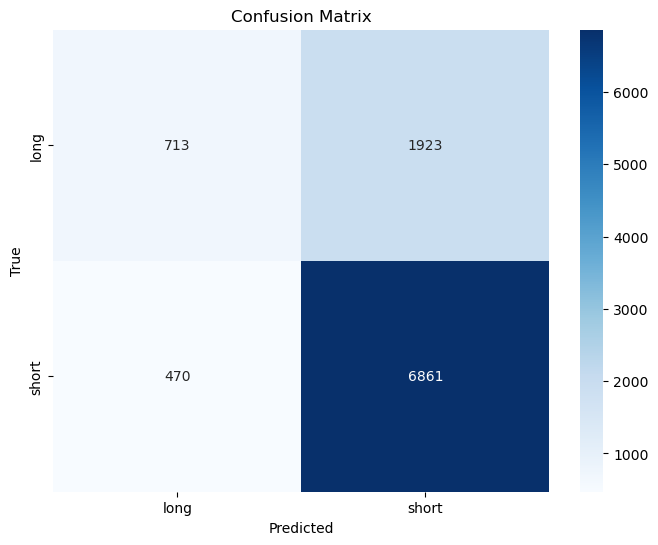

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Transform target variable into binary categories
df_filtered['los_category'] = np.where(df_filtered['los'] > 4, 'long', 'short')

# Separate target variable (los_category) and predictors
X = df_filtered.drop(columns=['los', 'los_category'])  # predictors
y = df_filtered['los_category']  # target variable

# Encode the target variable into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
log_reg_model = LogisticRegression()

# Fit the model on the training data
log_reg_model.fit(X_train, y_train)

# Predict LOS category on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy of Logistic Regression:", accuracy)

# Print classification report
class_report = classification_report(y_test, y_pred_log_reg, target_names=label_encoder.classes_)
print("Classification Report:\n", class_report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [102]:
print(tp + tn)
print(fp + fn)

7549
2418


713: True Negatives (TN) - These are the 'short' LOS cases that were correctly classified as 'short'.

1923: False Positives (FP) - These are the 'short' LOS cases that were incorrectly classified as 'long'.

470: False Negatives (FN) - These are the 'long' LOS cases that were incorrectly classified as 'short'.

6861: True Positives (TP) - These are the 'long' LOS cases that were correctly classified as 'long'.


## Across the protected attributes

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered includes gender, raceGrouped, INS_Medicaid, INS_Medicare, and INS_Other columns
# Transform target variable into binary categories
df_filtered['los_category'] = np.where(df_filtered['los'] > 4, 'long', 'short')

# Separate target variable (los_category) and predictors
X = df_filtered.drop(columns=['los', 'los_category'])  # predictors
y = df_filtered['los_category']  # target variable

# Encode the target variable into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Include non-predictor columns for analysis purposes
X['gender'] = df_filtered['gender']
X['raceGrouped'] = df_filtered['raceGrouped']
X['INS_Medicaid'] = df_filtered['INS_Medicaid']
X['INS_Medicare'] = df_filtered['INS_Medicare']
X['INS_Other'] = df_filtered['INS_Other']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Remove non-predictor columns from the training data
X_train_predictors = X_train.drop(columns=['gender', 'raceGrouped', 'INS_Medicaid', 'INS_Medicare', 'INS_Other'])
X_test_predictors = X_test.drop(columns=['gender', 'raceGrouped', 'INS_Medicaid', 'INS_Medicare', 'INS_Other'])

# Initialize Logistic Regression model
log_reg_model = LogisticRegression()

# Fit the model on the training data
log_reg_model.fit(X_train_predictors, y_train)

# Predict LOS category on the test set
y_pred_log_reg = log_reg_model.predict(X_test_predictors)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy of Logistic Regression:", accuracy)

# Print classification report
class_report = classification_report(y_test, y_pred_log_reg, target_names=label_encoder.classes_)
print("Classification Report:\n", class_report)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Create DataFrame for bias analysis
df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_pred'] = y_pred_log_reg

# Evaluate performance for gender
print("\nPerformance by Gender:")
for gender in [0, 1]:
    subset = df_test[df_test['gender'] == gender]
    conf_matrix_gender = confusion_matrix(subset['y_test'], subset['y_pred'])
    print(f"Gender: {'Female' if gender == 0 else 'Male'}")
    print(conf_matrix_gender)
    print(classification_report(subset['y_test'], subset['y_pred'], target_names=label_encoder.classes_))

# Evaluate performance for race
print("\nPerformance by Race:")
for race in [0, 1]:
    subset = df_test[df_test['raceGrouped'] == race]
    conf_matrix_race = confusion_matrix(subset['y_test'], subset['y_pred'])
    print(f"Race: {'Nonminority' if race == 0 else 'Minority'}")
    print(conf_matrix_race)
    print(classification_report(subset['y_test'], subset['y_pred'], target_names=label_encoder.classes_))

# Evaluate performance for insurance categories
print("\nPerformance by Insurance Category:")

# Medicaid
for medicaid in [0, 1]:
    subset = df_test[df_test['INS_Medicaid'] == medicaid]
    conf_matrix_medicaid = confusion_matrix(subset['y_test'], subset['y_pred'])
    print(f"Medicaid: {'No' if medicaid == 0 else 'Yes'}")
    print(conf_matrix_medicaid)
    print(classification_report(subset['y_test'], subset['y_pred'], target_names=label_encoder.classes_))

# Medicare
for medicare in [0, 1]:
    subset = df_test[df_test['INS_Medicare'] == medicare]
    conf_matrix_medicare = confusion_matrix(subset['y_test'], subset['y_pred'])
    print(f"Medicare: {'No' if medicare == 0 else 'Yes'}")
    print(conf_matrix_medicare)
    print(classification_report(subset['y_test'], subset['y_pred'], target_names=label_encoder.classes_))

# Other Insurance
for other in [0, 1]:
    subset = df_test[df_test['INS_Other'] == other]
    conf_matrix_other = confusion_matrix(subset['y_test'], subset['y_pred'])
    print(f"Other Insurance: {'No' if other == 0 else 'Yes'}")
    print(conf_matrix_other)
    print(classification_report(subset['y_test'], subset['y_pred'], target_names=label_encoder.classes_))
